In [1]:
import pickle


simworldname = 'simulationWorld_library1.xml'
groundtruth = 'rssi.csv'

f = open('Data_' + simworldname + '.pckl', 'rb')
data1, oracle1, analyzer1 = pickle.load(f)
f.close()

data = {}

In [2]:
###############################
#### DATA ANALYSIS SECTION ####
###############################

from datetime import datetime
import numpy as np

def AskLocationFromLocalizer(recent_grid):
    x, y = np.mean(zip(*np.where(recent_grid == np.max(recent_grid))), axis = 0)
    return [x/10, y/10]



readable_time_oracle = []
readable_time_analyzer = []
estimated_location = []
oracle_location = []

for t in oracle1['time']:
    readable_time_oracle.append(datetime.fromtimestamp(t/1000))
    
for t in analyzer1['time']:
    readable_time_analyzer.append(datetime.fromtimestamp(int(t)/1000))

for g in analyzer1['gridmap']:
    estimated_location.append(AskLocationFromLocalizer(g))
    
for t in oracle1['location']:
    oracle_location.append([t[0]/10, t[1]/10])


In [3]:
oracle_location

[[2.0, 3.0],
 [2.1, 2.9],
 [2.2, 2.8],
 [2.2, 2.7],
 [2.3, 2.6],
 [2.4, 2.5],
 [2.5, 2.4],
 [2.5, 2.3],
 [2.6, 2.2],
 [2.7, 2.1],
 [2.8, 2.0],
 [2.8, 1.9],
 [2.9, 1.8],
 [3.0, 1.7],
 [3.1, 1.6],
 [3.1, 1.5],
 [3.2, 1.4],
 [3.3, 1.3],
 [3.4, 1.2],
 [3.4, 1.1],
 [3.6, 0.9],
 [3.7, 0.9],
 [3.9, 0.9],
 [4.0, 0.9],
 [4.2, 0.9],
 [4.3, 0.9],
 [4.5, 0.9],
 [4.6, 0.9],
 [4.8, 0.9],
 [4.9, 0.9],
 [5.1, 0.9],
 [5.2, 0.9],
 [5.4, 0.9],
 [5.5, 0.9],
 [5.7, 0.9],
 [5.8, 0.9],
 [6.0, 0.9],
 [6.0, 1.0],
 [6.0, 1.2],
 [5.9, 1.2],
 [5.7, 1.2],
 [5.6, 1.2],
 [5.4, 1.2],
 [5.3, 1.2],
 [5.1, 1.2],
 [5.0, 1.2],
 [4.8, 1.2],
 [4.7, 1.2],
 [4.5, 1.2],
 [4.4, 1.2],
 [4.2, 1.2],
 [4.1, 1.2],
 [3.9, 1.2],
 [3.8, 1.2],
 [3.6, 1.2],
 [3.5, 1.2],
 [3.3, 1.2],
 [3.2, 1.2],
 [3.0, 1.2],
 [3.1, 1.1],
 [3.2, 1.1],
 [3.3, 1.0],
 [3.4, 1.0],
 [3.5, 0.9],
 [3.6, 0.8],
 [3.7, 0.8],
 [3.8, 0.7],
 [3.9, 0.7],
 [4.0, 0.6],
 [4.1, 0.5],
 [4.2, 0.5],
 [4.3, 0.4],
 [4.5, 0.3],
 [4.5, 0.4],
 [4.5, 0.6],
 [4.6, 0.5],
 [4.7, 0.5],

In [4]:
for t in range(len(analyzer1['time'])):
    analyzer1['time'][t] = int(analyzer1['time'][t])

In [5]:
deleted_times = []
data2 = {}
data2['time'] = []
data2['location'] = []
unpredicted_start = 0

data2['time'] = sorted(set(analyzer1['time'] + oracle1['time']))


for t in data2['time']:
    try:
        data2['location'].append(AskLocationFromLocalizer(analyzer1['gridmap'][analyzer1['time'].index(t)]))
        # print("shadan")
    except:
        try:
            data2['location'].append(data2['location'][len(data2['location']) - 1])
            # print("no")
        except:
            deleted_times.append(t)
            unpredicted_start = unpredicted_start + 1
            # data['location'].append([0,0])

for t in deleted_times:
    data2['time'].remove(t)
            
temp_time = []
for t in data2['time']:
    temp_time.append(datetime.fromtimestamp(t/1000))



<IPython.core.display.Javascript object>


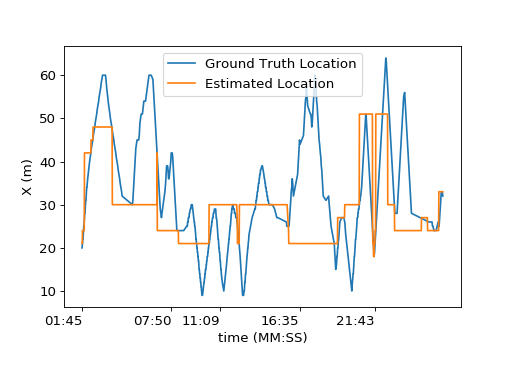

MSE:1.985084226646248


In [23]:
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error
from matplotlib.dates import DateFormatter
import datetime
import random
import matplotlib.pyplot as plt

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 12
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

# fig = plt.figure()

# (x, y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# (x)
# plt.plot(readable_time_oracle, zip(*oracle_location)[0] , label='Ground Truth (Oracle)')
# plt.plot(temp_time, zip(*data2['location'])[0], label='Estimated Location (Shadan)')

# (y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# plt.legend()
# plt.xlabel('time (HH MM SS)')
# plt.ylabel('X (m)')

# plt.show()



fig, ax = plt.subplots()
ax.plot(readable_time_oracle, [i * 10 for i in zip(*oracle_location)[0]], label='Ground Truth Location')
ax.plot(temp_time, [i * 10 for i in zip(*data2['location'])[0]], label='Estimated Location')
plt.legend()
myFmt = DateFormatter("%M:%S")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_ticks(temp_time[0::140])
plt.xticks(rotation=90)
plt.xlabel('time (MM:SS)')
plt.ylabel('X (m)')
## Rotate date labels automatically
fig.autofmt_xdate()
plt.xticks(rotation=0)
plt.show()


print("MSE:" + str(mean_squared_error(zip(*oracle_location)[0], zip(*data2['location'])[0][0:len(zip(*oracle_location)[0])])))

In [24]:
len(zip(*oracle_location)[0])

653

<IPython.core.display.Javascript object>


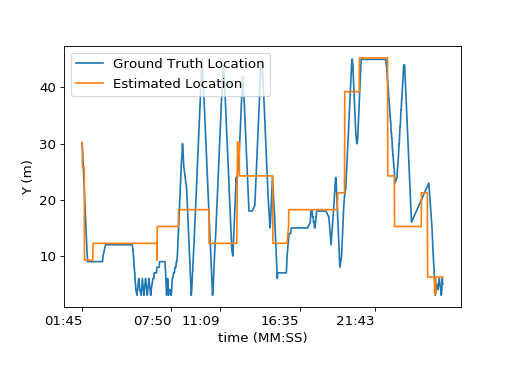

MSE:0.9815744640122513


In [25]:
# import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error
from matplotlib.dates import DateFormatter
import datetime
import random
import matplotlib.pyplot as plt

%matplotlib notebook

mpl.rcParams['legend.fontsize'] = 12
font = {'family' : 'normal',
        'size'   : 12}

plt.rc('font', **font)

# fig = plt.figure()

# (x, y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# (x)
# plt.plot(readable_time_oracle, zip(*oracle_location)[0] , label='Ground Truth (Oracle)')
# plt.plot(temp_time, zip(*data2['location'])[0], label='Estimated Location (Shadan)')

# (y)
# ax.plot(zip(*oracle_location)[0], zip(*oracle_location)[1],readable_time_oracle , label='Ground Truth (Oracle)')
# ax.plot(zip(*data['location'])[0], zip(*data['location'])[1], temp_time, label='Estimated Location (Shadan)')

# plt.legend()
# plt.xlabel('time (HH MM SS)')
# plt.ylabel('X (m)')

# plt.show()



fig, ax = plt.subplots()
ax.plot(readable_time_oracle, [i * 10 for i in zip(*oracle_location)[1]], label='Ground Truth Location')
ax.plot(temp_time, [i * 10 for i in zip(*data2['location'])[1]], label='Estimated Location')
plt.legend()
myFmt = DateFormatter("%M:%S")
ax.xaxis.set_major_formatter(myFmt)
ax.xaxis.set_ticks(temp_time[0::140])
plt.xticks(rotation=90)
plt.xlabel('time (MM:SS)')
plt.ylabel('Y (m)')
## Rotate date labels automatically
fig.autofmt_xdate()
plt.xticks(rotation=0)
plt.show()


print("MSE:" + str(mean_squared_error(zip(*oracle_location)[1], zip(*data2['location'])[1][0:len(zip(*oracle_location)[1])])))

In [ ]:
errors = []
for i in range(len(data2['location'])):
    errors.append(np.linalg.norm(np.asarray(oracle_location[i]) - np.asarray(data2['location'][i])))

In [ ]:
import matplotlib.pyplot as plt

print(np.max(errors))
print(reduce(lambda x, y: x + y, errors) / len(errors))
# plt.plot(errors)

In [ ]:
from scipy.stats import ttest_ind

print("T-test for ground truth and Shadan: ")
print(ttest_ind(oracle_location, data2['location']))